<a href="https://colab.research.google.com/github/ingridmidory/Machine-Learning-with-Python-/blob/main/ML_con_Python_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statistics
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
df_ad = pd.read_csv("/content/Advertising.csv") #dataframe_ad
df_ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
col = ['Sales', 'TV', 'Newspaper', 'Radio'] #creando una lista de columnas seleccionadas
df_ad = df_ad[col] #seleccionando las columnas de la lista
df_ad #para desplegar

,Sales,TV,Newspaper,Radio
0,22.1,230.1,69.2,37.8
1,10.4,44.5,45.1,39.3
2,9.3,17.2,69.3,45.9
3,18.5,151.5,58.5,41.3
4,12.9,180.8,58.4,10.8
...,...,...,...,...
195,7.6,38.2,13.8,3.7
196,9.7,94.2,8.1,4.9
197,12.8,177.0,6.4,9.3
198,25.5,283.6,66.2,42.0


# Analizyng the data

Scatter plots

<function matplotlib.pyplot.show(close=None, block=None)>

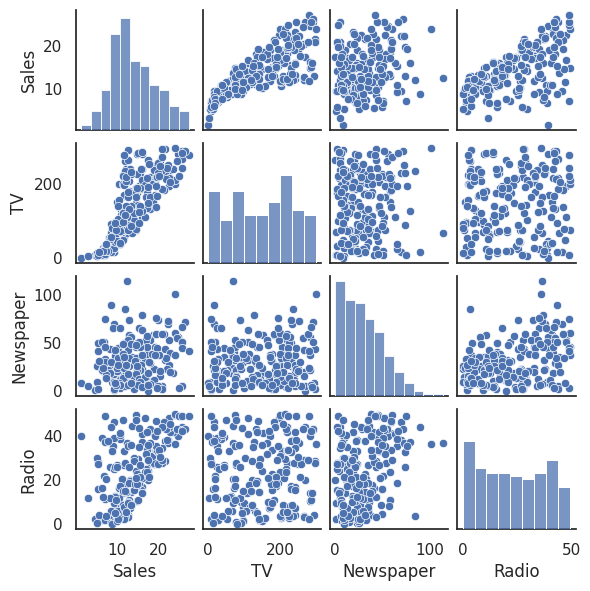

In [ ]:
import seaborn as sns
sns.set(style = 'white', context = 'notebook') #el contexto de notebook es para que salgan en formato notebook
sns.pairplot(df_ad, height = 1.5) #para graficar los datos
plt.show

Se presentan las graficas de dispersion de puntos



<Axes: >

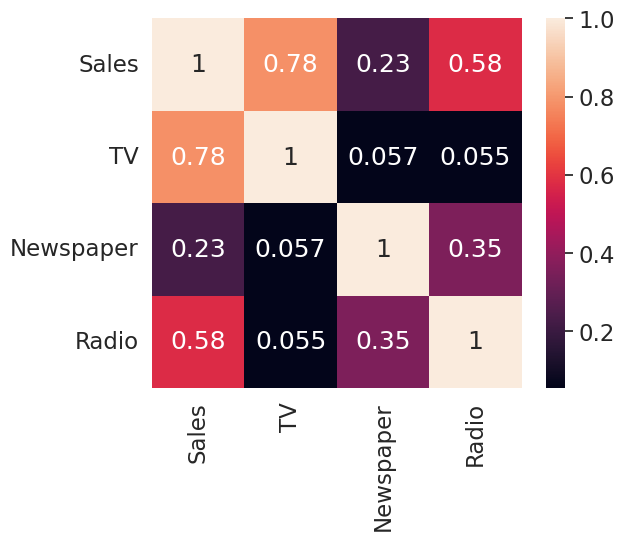

In [ ]:
cm = np.corrcoef(df_ad.values.T)  # obtain the values and then transpose to use them correctly
sns.set(font_scale=1.5)  # tamaño de la fuente
sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=col, xticklabels=col) #heatmap es el mapa de calor

In [ ]:
np.corrcoef(df_ad.values.T) #matriz de coeficientes de correlacion

array([[1.        , 0.78222442, 0.22829903, 0.57622257],
       [0.78222442, 1.        , 0.05664787, 0.05480866],
       [0.22829903, 0.05664787, 1.        , 0.35410375],
       [0.57622257, 0.05480866, 0.35410375, 1.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression

Definir variables

In [ ]:
x = np.array (df_ad[['TV']])
y = np.array (df_ad['Sales'])

In [ ]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

# Getting the Linear Model

In [ ]:
lm_fit = LinearRegression() #llamar la clase de regresión lineal
lm_fit.fit(x,y) #entrenar el modelo

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(x,y)}") #pendiente de la recta e interseccion con el eje x

 intercept:7.032593549127695 
 R^2 : 0.611875050850071


Hasta aquí no me ha dado el error; para esto usaremos otra libreria para construir otro modelo lineal

In [ ]:
import statsmodels.api as sm #statsmodels es una biblioteca de python que proporciona clases y funciones para la estimacipon de muchos modelos diferentes, asó como para a realización de pruebas estadísticas y la exloración de datos

lm_fit_OLS = sm.OLS(y, x).fit () #model definition
print(lm_fit_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):                   3.52e-100
Time:                        20:33:37   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print (f" Sales ={lm_fit.intercept_} + {lm_fit.coef} TV")

AttributeError: 'LinearRegression' object has no attribute 'coef'

Ahora vamos a predecir valores; es decir, poner a pruebas el modelo que ya hicimos:

In [ ]:
money = 1000 #valor a predecir
TV_money= np.array([[money]])
lm_fit.predict(TV_money)

array([54.56923398])

Lo anterior es, si invierto $\$1000$ en publicidad en la TV, vendere 54 productos




In [ ]:
df_ad['predicted'] = lm_fit.predict(x) #creando una nueva columna en el dataframe
df_ad

,Sales,TV,Newspaper,Radio,Sales_predicted,predicted
0,22.1,230.1,69.2,37.8,17.970775,17.970775
1,10.4,44.5,45.1,39.3,9.147974,9.147974
2,9.3,17.2,69.3,45.9,7.850224,7.850224
3,18.5,151.5,58.5,41.3,14.234395,14.234395
4,12.9,180.8,58.4,10.8,15.627218,15.627218
...,...,...,...,...,...,...
195,7.6,38.2,13.8,3.7,8.848493,8.848493
196,9.7,94.2,8.1,4.9,11.510545,11.510545
197,12.8,177.0,6.4,9.3,15.446579,15.446579
198,25.5,283.6,66.2,42.0,20.513985,20.513985


from matplotlib import pyplot as plt
df_ad['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='Sales', y='TV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='TV', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='Newspaper', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='Radio', y='Sales_predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ad['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ad['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ad['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

Agregamos una columna a la tabla llamada "predicted" que me ayuda a predecir los valores. Esto nos ayuda a mantener la informacion en una sola tabla.

In [ ]:
df_ad['residuals']=df_ad['Sales']-df_ad['predicted'] #creando una nueva columna en el dataframe

mse = np.mean(df_ad['residuals']**2)
rmse = np.sqrt(mse)

n= len(df_ad)
p=1
rse = rmse * np.sqrt((n)/(n-p-1))

print(f"MSE: {mse}")

MSE: 10.512652915656757


In [ ]:
def RSE (y_true, y_predicted):

  y_true = np.array(y_true)
  y_predicted = np.array(y_predicted)
  RSS=np.sum(np.square(y_true-y_predicted))

  rse= math.sqrt(RSS/ (len(y_true)-2))

  return rse

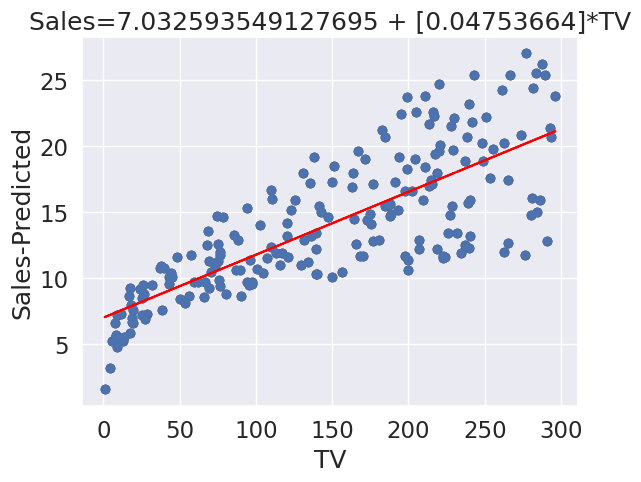

In [ ]:
plt.scatter(df_ad['TV'], df_ad['Sales'], color='black') #de dispersion
plt.plot(df_ad['TV'], df_ad['predicted'], color='red') #lineal

plt.title (f"Sales={lm_fit.intercept_} + {lm_fit.coef_}*TV") #titulo de la grafica
plt.xlabel("TV")
plt.ylabel("Sales-Predicted")
plt.scatter(x,y)
plt.show()

In [ ]:
yy = df_ad[['TV', 'Radio']].values  # Select multiple columns and convert to NumPy array
z = df_ad['Sales'].values
lm_fit = LinearRegression()
lm_fit.fit(yy, z)

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(yy,z)}")

 intercept:2.9210999124051362 
 R^2 : 0.8971942610828957
